<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 3 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> Version: 2.00</h2>
</center>

# Contexto


El elipsoide rotado es una superficie curva cerrada cuyas tres secciones ortogonales principales son elípticas, es decir, son originadas por planos que contienen dos ejes cartesianos cada plano. Como se observa en el siguiente gráfico.

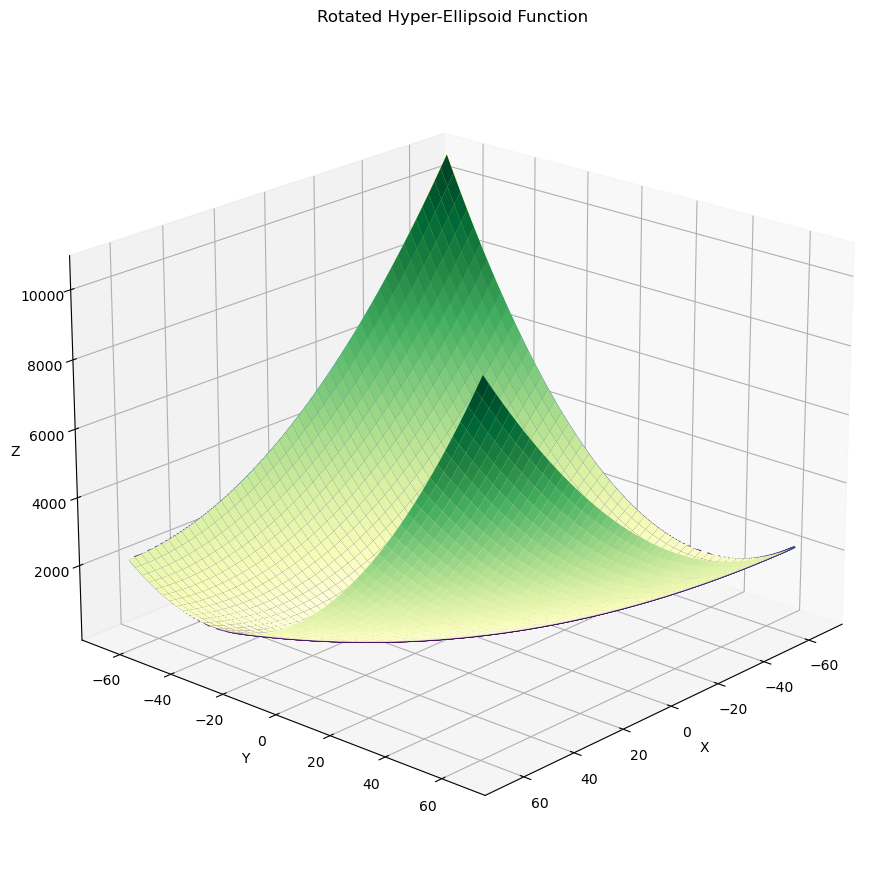
 
En esta tarea usted analizará la siguiente ecuación de un elipsoide sujeta a un parámetro $\lambda$, para observar el comportamiento de las iteraciones al aplicar los distintos métodos de resolución de sistemas de ecuaciones lineales vistos en clases.

Sea $\lambda>0$ y $f:\mathbb{R}^2 \rightarrow \mathbb{R}$ definido por 

$$
    f(x,y) = \frac{1}{2}x^2 + \frac{\lambda}{2}y^2 + xy \ \ \forall \ x,y \in \mathbb{R}
$$


# Librerías (no utilizar liberías adicionales)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-block alert-danger"><b> No debe utilizar np.linalg.inv en su desarrollo para el calculo de las matrices inversas</b>
</div>

# Desarrollo

## Pregunta 1 (10 puntos): Análisis de la función

Hacer gráficos de la función para distintos valores del parámetro $\lambda$ y responder las siguientes preguntas:

- Gráficamente ¿Cuál es el mínimo o máximo de la función?
- ¿Qué ocurre con la función cuando el valor de $\lambda$ varía?


Para esta pregunta debe completar la función graficar_3d con la función $f(x,y)$ entregada en el enunciado, luego puede utilizarla con distintos valores de lambda para obtener los gráficos

In [2]:
def graficar_3d(lam):
    def f(x,y,lam):
        """
        Parameters
        ----------
        x    :float array
                x value
        y    :float array
                y value
        lam  :float
                lambda value
        Returns
        -------
        f_x   :float
                value of function f
        """
        #Aquí va su código
        first = np.power(x, 2)*0.5
        second = np.power(y, 2)*(lam/2)
        third = x * y
        f_x = first + second + third
        return f_x

    #No modificar las siguientes lineas
    x1= np.linspace(-65.536,65.536,500)
    x2= np.linspace(-65.536,65.536,500)
    r_min,r_max=-65.536,65.536
    x1,x2=np.meshgrid(x1,x2)
    results=f(x1,x2,lam)
    figure=plt.figure(figsize=(9,9))
    axis = plt.axes(projection="3d")
    axis.set_title('Rotated Hyper-Ellipsoid Function')
    axis.contour3D(x1, x2, results,450)
    axis.plot_surface(x1,x2,results)
    axis.view_init(21,42)
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_zlabel('Z')
    plt.show()

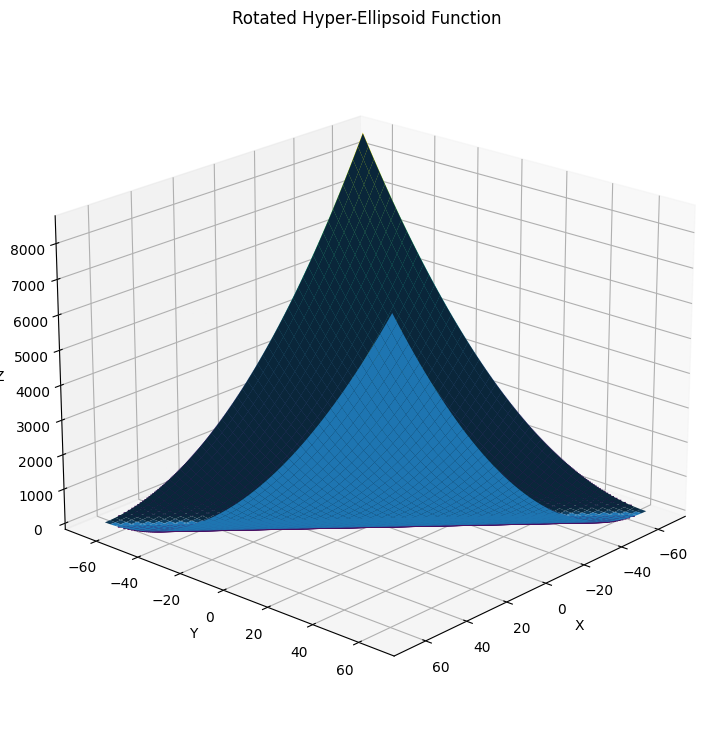

In [3]:
graficar_3d(1)

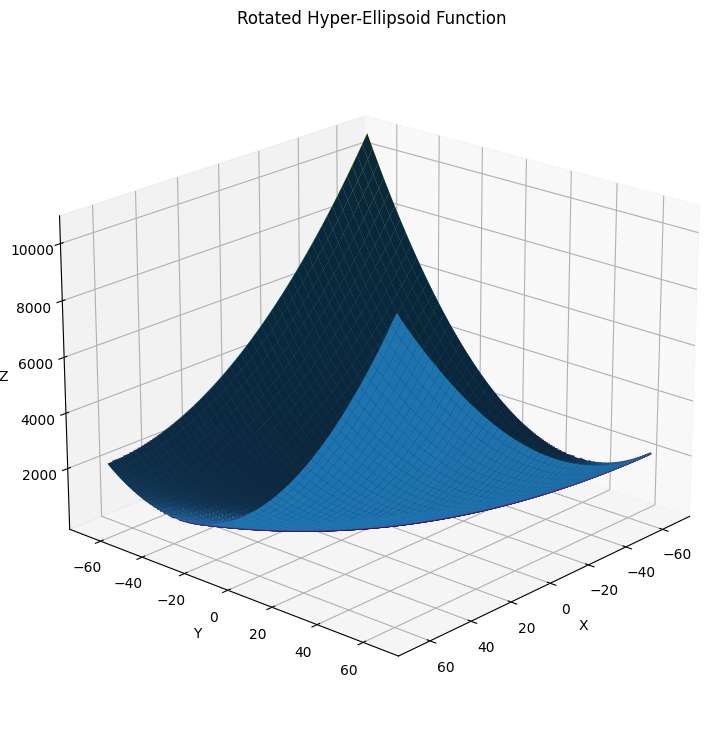

In [4]:
graficar_3d(2)

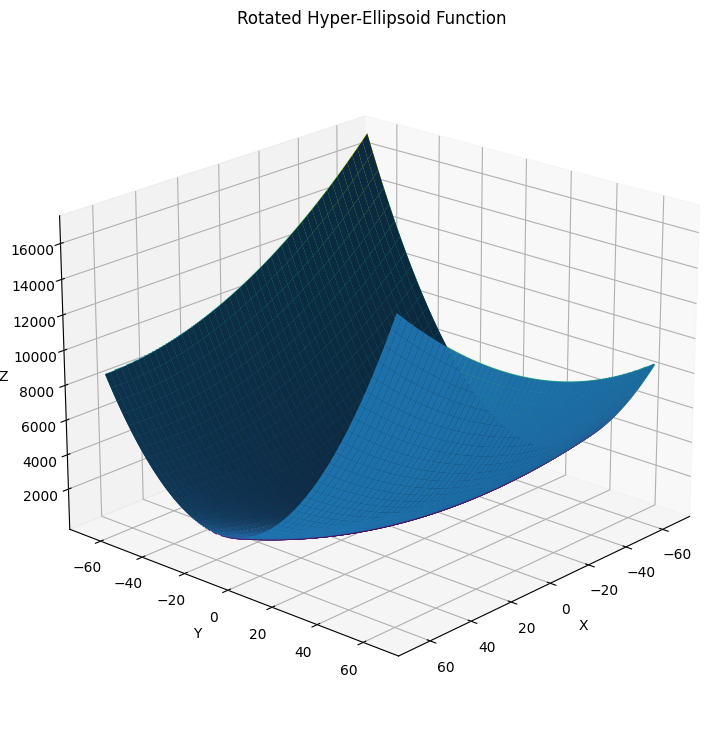

In [5]:
graficar_3d(5)

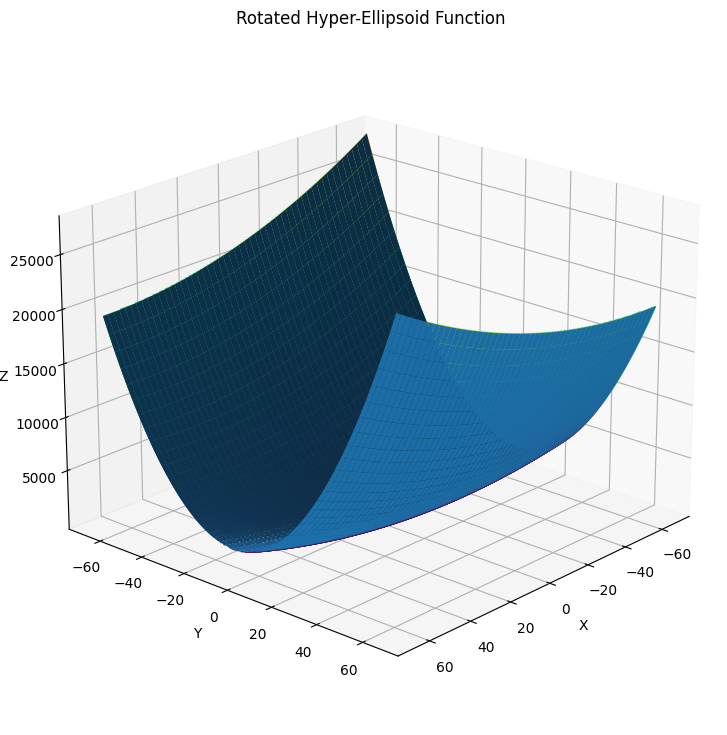

In [6]:
graficar_3d(10)

#### Gráficamente ¿Cuál es el mínimo o máximo de la función?
R: se puede visualizar que el minimo de la funcion del eliposoide rotado en el el punto $(x,y) = (0,0)$, en el cual al evaluar la funcion en este punto se obtiene el valor $f(x, y) = 0$

#### ¿Qué ocurre con la función cuando el valor de $\lambda$ varía?
R: Comparando las graficas anterior se puede apreciar que al aumetar el valor de $\lambda$ entre $[1,10]$ se genrea una especie de "zoom" hacia el origen, esto significa que el tamaño de la elipsoide aumenta a medida que se aumenta el valor de $\lambda$. Este comportamiento se puede explicar al por el componente $\frac{\lambda}{2}y^2$ de la funcion $f(x,y)$, ya que si se aumenta $\lambda$ el valor de esta componente tambien aumentara proporcionalmente.

## Pregunta 2 (30 puntos): Newton en $\mathbb{R}^n$

El objetivo es encontrar el mínimo de la función $f(x,y)$, para ello se le pide encontrar una iteración con el método de Newton para $\mathbb{R}^n$, es decir, llegar a una expresión de la forma:

$$
    x_{i+1} = x_i - J^{-1}(x_i) F(x_i)
$$

Donde se busca resolver $F(x) = 0$, para $F: \mathbb{R}^n \rightarrow \mathbb{R}^n$ una función diferenciable, con $J^{-1}(x_i)$ la matriz Jacobiana inversa de $F$ evaluada en el punto $x_i$

### 2.1 (15 puntos) Desarrollo
Escriba aquí el desarrollo que realizó para obtener la iteración del método de Newton



**Solución:** 
Para obtener el punto critico de una funcion 2d se puede ocupar derivadas parciales donde $\frac{\partial}{\partial x}f(x,y) = 0$ y $\frac{\partial}{\partial y}f(x,y) = 0$. Para el caso de nuestro f(x, y) esto genera dos funciones:  
$\frac{\partial}{\partial x}f(x,y) = f_{1}(x,y) = x + y = 0$  
$\frac{\partial}{\partial x}f(x,y) = f_{2}(x,y) = x + \lambda y = 0$  
con esto $F(x) = 0$ queda definido como lo siguiente. 
\begin{pmatrix}
x + y\\
x + \lambda y
\end{pmatrix}

=
\begin{pmatrix}
0\\
0
\end{pmatrix}

Ahora se puede obtener $J(x)$ mediante la derivacion parcial de tanto $f_{1}$ como $f_{2}$ lo que queda como:  
$\frac{\partial}{\partial x}f_{1}(x,y) = 1$  
$\frac{\partial}{\partial y}f_{1}(x,y) = 1$  
$\frac{\partial}{\partial x}f_{2}(x,y) = 1$  
$\frac{\partial}{\partial y}f_{2}(x,y) = \lambda$

con esto $J(x)$ queda definido como lo siguiente:  
\begin{pmatrix}
1&1\\
1&\lambda
\end{pmatrix}  

Lo cual se debido a las caracteristicas de esta matrix se puede invertir con una descomposicion en valores propios de una matriz.

### 2.2 (15 puntos) Implementación

Se le pide implementar las siguientes funciones

- **J_inv(x,ld)**, la cual calcula la inversa del Jacobiano $J^{-1}(x)$ dado un valor de $x \in \mathbb{R}^2$ y un valor *ld* que corresponde al parámetro $\lambda$.
- **F(x,ld)**, la cual calcula la función $F(x)$ para un valor de $x \in \mathbb{R}^2$ y un valor *ld* que corresponde al parámetro $\lambda$.
- **newton_rhapson(ld, x0, n_iter, J_inv, F)**, la cual realiza las iteraciones del método de Newton, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración . Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, las funciones $J^{-1}(x)$ y $F(x)$, una variable *ld* que corresponde al parámetro $\lambda$ y una cantidad de iteraciones.




In [7]:
def J_inv(x, ld):
    """
    Parameters
    ---------- 
    x        :  float array
                value for x,y
    ld       :  float
                value of parameter lambda
    Returns
    -------
    J_inv     : float array
                value of the inverse             
    """
    x, y = x
    
    dp_f1_x = lambda x, y, ld: 1
    dp_f1_y = lambda x, y, ld: 1
    
    dp_f2_x = lambda x, y , ld: 1
    dp_f2_y = lambda x, y , ld: ld
    
    J = np.asarray([[dp_f1_x(x, y, ld), dp_f1_y(x, y, ld)],
                  [dp_f2_x(x, y, ld), dp_f2_y(x, y, ld)]])
    
    
    #np.linalg.inv(J)
    w, v = np.linalg.eig(J)
    w_1 = np.power(w, -1)
    d_1 = np.diag(w_1)
    Q = v
    Q_1 = v.T
    
    
    J_inv = Q @ d_1 @ Q_1
    
    return J_inv

def F(x, ld):
    """
    Parameters
    ---------- 
    x       :  float array
                value for x,y
    ld      :  float
                value of parameter lambda
    Returns
    -------
    F       : float array
                value of the function F(x)   
    """
    x , y = x
    f1 = lambda x, y, ld: x + y
    f2 = lambda x, y, ld: x + (y*ld)
    F = np.asarray([f1(x,y,ld),f2(x, y, ld)])
    return F
    
def newton_rhapson(ld,x0, n_iter, J_inv,F):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    J_inv     : function
                Function to evaluate inverse of Jacobian of F
    F         : function
                Function to evaluate F
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of x during iterations
    """
    for _ in np.arange(n_iter):
        x0 = x0 - (J_inv(x0, ld) @ F(x0, ld))
    x = x0
    return x

In [8]:
#Valor de prueba
newton_rhapson(10, np.random.rand(2,1), 50, J_inv,F)

array([[0.],
       [0.]])

## Pregunta 3 (20) puntos): Jacobi y Gauss-Seidel

A continuación se utilizarán los métodos de Jacobi y Gauss-Seidel con el objetivo de encontrar los mínimos de la función $f(x,y)$ del enunciado. Para ello, usted debe plantear el problema como un sistema de ecuaciones lineales, es decir, de la forma $Ax=b$.

### 3.1 (10 puntos) Sistema de ecuaciones lineales
Escriba aquí su desarrollo para plantear el problema en su forma $Ax=b$

**Solución:**
Con un desarrollo similar a la pregunta anterior se obtiene que:  
$\frac{\partial}{\partial x}f(x,y) = f_{1}(x,y) = x + y = 0$   
$\frac{\partial}{\partial x}f(x,y) = f_{2}(x,y) = x + \lambda y = 0$  
Con lo cual se define $A$ como:  
\begin{pmatrix}
1&1\\
1&\lambda
\end{pmatrix}  
$b$ se define como:  
\begin{pmatrix}
0\\
0
\end{pmatrix}  
y $x$ se define como:
\begin{pmatrix}
x\\
y
\end{pmatrix}  

### 3.2 (5 puntos) Implementación del método de Jacobi

Se pide implementar la función **jacobi(ld, x0, n_iter, b)**  la cual realiza la iteración con el método de Jacobi, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración. Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, una variable *ld* que corresponde al parámetro $\lambda$, una cantidad de iteraciones y un arreglo del vector $b$ 

In [9]:
def jacobi(ld,x0,n_iter, b):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    b         : float array
                value of array b
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of array x during iterations
    """
    A  = np.asarray([[1, 1], [1, ld]], dtype = np.float64)
    
    U = np.triu(A, k = 1)
    D = np.diag(A)
    L = np.tril(A, k = -1)
    LU = L + U
    D_1 = np.float_power(D, -1)
    
    left = np.diag(D_1)
    for _ in np.arange(n_iter):
        right = b - (LU @ x0)
        x0 = left @ right
    x = x0
    
    return x

In [10]:
#Valor de prueba
jacobi(10,np.random.rand(2,1), 50, np.zeros((2,1)))

array([[8.18240357e-26],
       [3.22142840e-26]])

### 3.3 (5 puntos) Implementación del método de Gauss-Seidel

Se pide implementar la función **gauss_seidel**  la cual realiza la iteración con el método de Gauss-Seidel, entregando un arreglo con los valores de $x$ en cada iteración, es decir, $x[n]$ es el valor en la n-ésima iteración. Esta función recibe un punto inicial $x_0$ en $\mathbb{R}^2$, una variable *ld* que corresponde al parámetro $\lambda$, una cantidad de iteraciones y un arreglo del vector $b$ 

In [11]:
def gauss_seidel(ld, x0, n_iter, b):
    """
    Parameters
    ---------- 
    x0        : float array
                Initial value for x,y
    b         : float array
                value of array b
    ld      :  float
                value of parameter lambda
    n_iter   : int
                Number of iterations
    Returns
    -------
    x      : float array
             value of array x during iterations
    """
    A  = np.asarray([[1, 1], [1, ld]])
    
    U = np.triu(A, k = 1)
    D = np.diag(np.diag(A))
    L = np.tril(A, k = -1)
    LD = L + D

    for _ in np.arange(n_iter):
        
        w, v = np.linalg.eig(LD)
        w_1 = np.power(w, -1)
        d_1 = np.diag(w_1)
        Q = v
        Q_1 = v.T
        left = Q @ d_1 @ Q_1
        
        #left = np.linalg.inv(LD)
        right = b - (U @ x0)
        x0 = left @ right
    x = x0 
    return x

In [12]:
#Valor de prueba
gauss_seidel(10, np.random.rand(2,1), 50, np.zeros((2,1)))

array([[-5.31035144e-48],
       [ 5.90039049e-49]])

## Pregunta 4 (20 puntos): Experimentos

### 4.1 Obtención Normas (15 puntos)

En esta pregunta se van a comparar los resultados de los 3 métodos implementados. Para ello se pide implementar de forma vectorizada la función *method_norm*, la cual recibe los siguientes parámetros:

- ld: Valor de $\lambda$
- initial val: valor inicial para los métodos iterativos
- n_iter: cantidad de iteraciones a realizar
- b: vector $b$ para los métodos de jacobi y gauss-seidel
- J_inv: Función que calcular la inversa del jacobiano para el método de newton
- F: función a resolver con el método de newton

La función debe retornar 3 numpy array (jacobi_norm, newton_norm, gauss_norm) que obtienen la norma del vector x que retornan los métodos implementados en las preguntas anteriores. Por ejemplo, jacobi_norm es un np.array que se obtiene al aplicar la norma a cada uno de los valores del vector x, el cual es el resultado de llamar a la función *newton_rhapson*


<div class="alert alert-block alert-info"><a>puede utilizar la función np.linalg.norm() de numpy </a></div>

In [13]:
def method_norm(ld, initial_val, n_iter, b, J_inv,F):
    """
    Parameters
    ---------- 
    ld           :  float
                    value of parameter lambda
    initial_val  : float array
                    Initial value for x,y
    
    n_iter       : int
                    Number of iterations
    b            : float array
                    value of array b
    J_inv     : function
                Function to evaluate inverse of Jacobian of F
    F         : function
                Function to evaluate F
    Returns
    -------
    jacobi_norm  : float array
                    value of the norm of the array x during jacobi method
    newton_norm  : float array
                    value of the norm of the array x during newton method
    gauss_norm  : float array
                    value of the norm of the array x during gauss-seidel method
    """
    
    #Aquí va su código
    #no estoy seguro que norma utilizar asi que dejo ord de np.linalg.norm en el default
    jacobi_ = jacobi(ld, initial_val, n_iter, b)
    gauss_ = gauss_seidel(ld, initial_val, n_iter, b)
    newton_ = newton_rhapson(ld, initial_val, n_iter, J_inv, F)

    jacobi_norm = np.linalg.norm(jacobi_)
    gauss_norm = np.linalg.norm(gauss_)
    newton_norm = np.linalg.norm(newton_)
    
    return jacobi_norm, newton_norm, gauss_norm

### 4.2 Experimentos (5 puntos)
A continuación se pide realizar experimentos con los siguientes valores de $\lambda = \{2,10,1000\}$ sobre cada uno de los métodos implementados en las preguntas anteriores. Para ello elija un punto inicial aleatorio e inicialice los métodos desde el mismo punto, con 20 iteraciones.

In [14]:
initial_val = np.random.rand(2,1)
ld = np.asarray([2,10,100])
n_iter = 20
#Aquí va su código
method_norm(ld[0], initial_val, n_iter, np.zeros((2,1)), J_inv, F)

(0.0009298174243707764, 0.0, 1.250047451428741e-06)

In [15]:
method_norm(ld[1], initial_val, n_iter, np.zeros((2,1)), J_inv, F)

(9.521330425556754e-11, 0.0, 5.401215207342673e-19)

In [16]:
method_norm(ld[2], initial_val, n_iter, np.zeros((2,1)), J_inv, F)

(9.521330425556752e-21, 0.0, 1.1196407383305517e-38)

Luego observe cuales son los puntos en la última iteración en cada uno de los métodos

In [17]:
#Aquí va su código
#Jacobi
np.asarray([jacobi(ld[0], initial_val, n_iter, np.zeros((2,1))), jacobi(ld[1], initial_val, n_iter, np.zeros((2,1))), jacobi(ld[2], initial_val, n_iter, np.zeros((2,1)))])

array([[[2.12833846e-04],
        [9.05131038e-04]],

       [[2.17941858e-11],
        [9.26854183e-11]],

       [[2.17941858e-21],
        [9.26854183e-21]]])

In [18]:
#Gauss
np.asarray([gauss_seidel(ld[0], initial_val, n_iter, np.zeros((2,1))), gauss_seidel(ld[1], initial_val, n_iter, np.zeros((2,1))), gauss_seidel(ld[2], initial_val, n_iter, np.zeros((2,1)))])

array([[[-8.83917030e-07],
        [ 8.83917030e-07]],

       [[-5.36817994e-19],
        [ 5.96464438e-20]],

       [[-1.11958362e-38],
        [ 1.13089255e-40]]])

In [19]:
#Newton
np.asarray([newton_rhapson(ld[0], initial_val, n_iter, J_inv, F), newton_rhapson(ld[1], initial_val, n_iter, J_inv, F), newton_rhapson(ld[2], initial_val, n_iter, J_inv, F)])

array([[[ 0.00000000e+000],
        [ 8.90029543e-308]],

       [[ 0.00000000e+000],
        [ 8.48798316e-314]],

       [[ 5.25614070e-298],
        [-4.47966537e-300]]])

## Pregunta 5 (10 puntos): Conclusiones

Finalmente, se pide que concluya respecto a los resultados obtenidos.

- ¿Qué método obtuvo mejor resultado y por qué?
- ¿Qué ocurre al variar el parámetro $\lambda$? ¿Llegaron los métodos al mínimo esperado?

R1: El metodo que obtiene el mejor resultado entre jacobi, Gauss-Seidel y Newton-Rhapson es el metodo de newton como se puede apreciar en los resultados anteriores la norma del vector x de newton es igual a 0.0 el cual es el menor de los 3 metodos estudiados.  
R2: Al aumentar $\lambda$ se puede apreciar que el error disminuye, pero esto no es muy significatico ya que con un $\lambda = 2$ se ve que se obtiene un error de -4 ordenes de magnitud en el peor de los metodos (jacobi) lo cual es bastante cercano al valor esperado. Tambien se puede notar que todos los metodos llegaron al valor esperado de $(x, y) = (0, 0)$.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57673af8-dd90-4dbc-a4bd-4284b8b1e209' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>